In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/recasd3class1/3_class'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/45.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/20.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/6.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/5.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/8.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/30.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/38.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/42.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/33.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/10.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/54.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/35.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/41.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/9.jpg
/kaggle/input/recasd3class1/3_class/test 3/test 3/Neutral/37.jpg
/kaggle/input/recasd3class1/3

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os


In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [4]:
train_dataset = datasets.ImageFolder(root='/kaggle/input/recasd3class1/3_class/test 3', transform=transform)
test_dataset = datasets.ImageFolder(root='/kaggle/input/recasd3class1/3_class/train 7', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [5]:
class EmotionClassifier(nn.Module):
    def __init__(self, num_classes=3):
        super(EmotionClassifier, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

model = EmotionClassifier(num_classes=3)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 137MB/s] 


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [7]:
def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}')

    print('Training complete')

train_model(model, criterion, optimizer, num_epochs=3)


Epoch 1/3, Loss: 0.2232503045233898
Epoch 2/3, Loss: 0.0013357072020880878
Epoch 3/3, Loss: 0.00014932148860680172
Training complete


Class Distribution (Test Set):
[997]


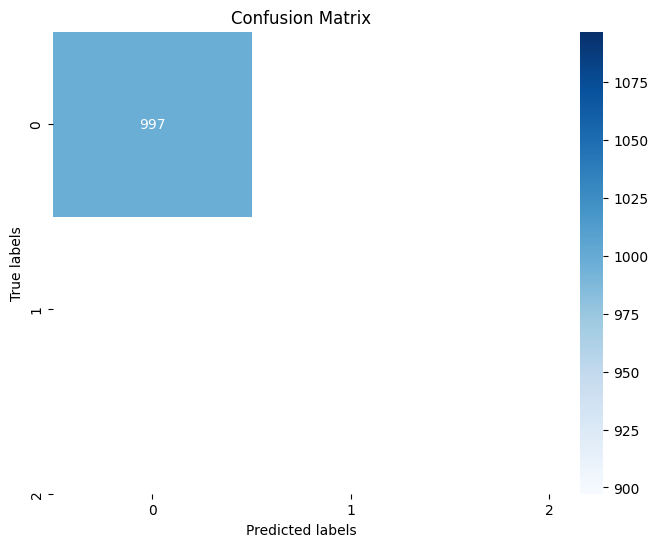

Accuracy: 100.00%
[[997]]
Precision: [1.]
Recall: [1.]
F1-Score: [1.]


In [10]:
import torch
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
num_classes=3;
def evaluate_model(model, test_loader, num_classes):
  """
  Evaluates the PyTorch model on the test data and calculates accuracy,
  confusion matrix, precision, recall, and F1-score.

  Args:
      model (torch.nn.Module): The PyTorch model to be evaluated.
      test_loader (torch.utils.data.DataLoader): The test data loader.
      num_classes (int): The number of classes in the dataset.

  Returns:
      tuple: A tuple containing accuracy (float), confusion matrix (numpy.ndarray),
              precision (list), recall (list), and F1-score (list).
  """

  model.eval()
  correct = 0
  total = 0
  all_predictions = []
  all_labels = []

  with torch.no_grad():
    for images, labels in test_loader:
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

      all_predictions.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  accuracy = 100 * correct / total

  # Calculate confusion matrix
  cm = confusion_matrix(all_labels, all_predictions)

  # Calculate precision, recall, and F1-score per class (if applicable)
  if num_classes > 2:
    precision = precision_score(all_labels, all_predictions, average=None)
    recall = recall_score(all_labels, all_predictions, average=None)
    f1 = f1_score(all_labels, all_predictions, average=None)
  else:
    # For binary classification, use 'binary' averaging
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)

  # Additional Suggestions for More Insightful Evaluation:

  # 1. Print Class Distribution:
  print(f'Class Distribution (Test Set):\n{np.unique(all_labels, return_counts=True)[1]}')

  # 2. Visualize Predictions (optional):
  # You can use libraries like matplotlib to plot predicted vs. true labels.

  # 3. Evaluate on Training Data (optional):
  # Run this function on your training data to compare accuracy and confusion matrix.

  # Plot the confusion matrix (optional)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

  return accuracy, cm, precision, recall, f1

# Example usage (assuming you have a trained model, test loader, and num_classes defined)
accuracy, cm, precision, recall, f1 = evaluate_model(model, test_loader, num_classes)

print(f'Accuracy: {accuracy:.2f}%')
print(cm)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Accuracy: 100.00%
[[997]]
Precision (per class): [1.]
Recall (per class): [1.]
F1-Score (per class): [1.]
Precision (Macro): 1.0000
Recall (Macro): 1.0000
F1-Score (Macro): 1.0000


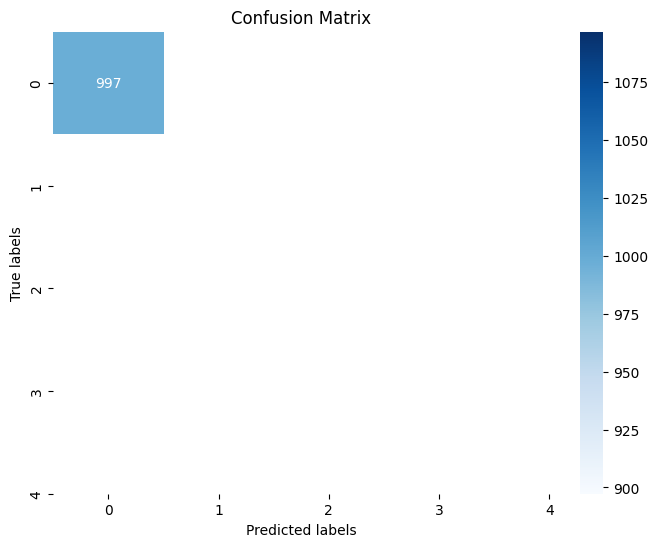

In [9]:
import torch
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

num_classes = 5  # Define the number of classes in your dataset

def evaluate_model(model, test_loader, num_classes):
  """
  Evaluates the PyTorch model on the test data and calculates accuracy,
  confusion matrix, precision, recall, and F1-score.

  Args:
      model (torch.nn.Module): The PyTorch model to be evaluated.
      test_loader (torch.utils.data.DataLoader): The test data loader.
      num_classes (int): The number of classes in the dataset.

  Returns:
      tuple: A tuple containing accuracy (float), confusion matrix (numpy.ndarray),
              precision (list), recall (list), and F1-score (list).
  """

  model.eval()
  correct = 0
  total = 0
  all_predictions = []
  all_labels = []

  with torch.no_grad():
    for images, labels in test_loader:
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

      all_predictions.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  accuracy = 100 * correct / total

  # Calculate confusion matrix
  cm = confusion_matrix(all_labels, all_predictions)

  # Calculate precision, recall, and F1-score per class (if applicable)
  if num_classes > 2:
    precision = precision_score(all_labels, all_predictions, average=None)
    recall = recall_score(all_labels, all_predictions, average=None)
    f1 = f1_score(all_labels, all_predictions, average=None)
  else:
    # For binary classification, use 'binary' averaging
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)

  # Calculate combined precision, recall, and F1-score (macro-averaged)
  precision_macro = precision_score(all_labels, all_predictions, average='macro')
  recall_macro = recall_score(all_labels, all_predictions, average='macro')
  f1_macro = f1_score(all_labels, all_predictions, average='macro')

  # Print results
  print(f'Accuracy: {accuracy:.2f}%')
  print(cm)
  print(f'Precision (per class): {precision}')
  print(f'Recall (per class): {recall}')
  print(f'F1-Score (per class): {f1}')
  print(f'Precision (Macro): {precision_macro:.4f}')
  print(f'Recall (Macro): {recall_macro:.4f}')
  print(f'F1-Score (Macro): {f1_macro:.4f}')

  # Plot the confusion matrix (optional)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

  return accuracy, cm, precision, recall, f1, precision_macro, recall_macro, f1_macro

# Example usage (assuming you have a trained model, test loader, and num_classes defined)
accuracy, cm, precision, recall, f1, precision_macro, recall_macro, f1_macro = evaluate_model(model, test_loader, num_classes)
